<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-team-64/blob/main/RetoParte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Entregable 2 Reto

Maestría en Inteligencia Artificial Aplicada

Curso: Ciencia y analítica de datos (Gpo 10)

Tecnológico de Monterrey

Prof Maria de la Paz Rico Fdz

Equipo 64

Nombre del estudiante: Juan Sebastián Téllez López

Matrícula: A01793859

Nombre del estudiante 2: José Fabricio Barahona Amaya

Matricula: A01793950

Fecha: Noviembre 18/2022

In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/PosgradoMNA/actividades-del-projecto-team-64/main/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv",encoding = "ISO-8859-1")



In [3]:
df.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CLAVE,1068,1068,DLAGU6,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SITIO,1068,1066,EL FUERTE,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ORGANISMO_DE_CUENCA,1068,13,CUENCAS CENTRALES DEL NORTE,232,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ESTADO,1068,32,DURANGO,121,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MUNICIPIO,1068,452,LA PAZ,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ACUIFERO,1068,273,PENINSULA DE YUCATAN,119,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SUBTIPO,1068,8,POZO,1039,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LONGITUD,1068.0,NaN,NaN,NaN,-101.891007,6.703263,-116.66425,-105.388865,-102.17418,-98.974716,-86.86412
LATITUD,1068.0,NaN,NaN,NaN,23.163618,3.88767,14.56115,20.212055,22.61719,25.510285,32.677713
PERIODO,1068.0,NaN,NaN,NaN,2020.0,0.0,2020.0,2020.0,2020.0,2020.0,2020.0


In [4]:
semaforoDict={'Verde':1, 'Rojo':2, 'Amarillo':3}
#df["SEMAFORO"].unique()

df["SEMAFORO"]=df["SEMAFORO"].apply(lambda x : semaforoDict[x])

In [5]:
y=df[["SEMAFORO"]]
X=df.drop(["SEMAFORO"], axis=1)

In [6]:
X.describe(include="all").transpose()
X=X.fillna(0)
X=X.replace(np.nan, 0)

In [7]:
y.describe(include='all').transpose()
X.select_dtypes(include=['object']).dtypes

CLAVE                   object
SITIO                   object
ORGANISMO_DE_CUENCA     object
ESTADO                  object
MUNICIPIO               object
ACUIFERO                object
SUBTIPO                 object
CALIDAD_ALC             object
CALIDAD_CONDUC          object
SDT_M_mg/L              object
CALIDAD_SDT_ra          object
CALIDAD_SDT_salin       object
FLUORUROS_mg/L          object
CALIDAD_FLUO            object
DUR_mg/L                object
CALIDAD_DUR             object
COLI_FEC_NMP/100_mL     object
CALIDAD_COLI_FEC        object
N_NO3_mg/L              object
CALIDAD_N_NO3           object
AS_TOT_mg/L             object
CALIDAD_AS              object
CD_TOT_mg/L             object
CALIDAD_CD              object
CR_TOT_mg/L             object
CALIDAD_CR              object
HG_TOT_mg/L             object
CALIDAD_HG              object
PB_TOT_mg/L             object
CALIDAD_PB              object
MN_TOT_mg/L             object
CALIDAD_MN              object
FE_TOT_m

In [8]:

X.select_dtypes(include=['object']).columns

Index(['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
       'ACUIFERO', 'SUBTIPO', 'CALIDAD_ALC', 'CALIDAD_CONDUC', 'SDT_M_mg/L',
       'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'FLUORUROS_mg/L', 'CALIDAD_FLUO',
       'DUR_mg/L', 'CALIDAD_DUR', 'COLI_FEC_NMP/100_mL', 'CALIDAD_COLI_FEC',
       'N_NO3_mg/L', 'CALIDAD_N_NO3', 'AS_TOT_mg/L', 'CALIDAD_AS',
       'CD_TOT_mg/L', 'CALIDAD_CD', 'CR_TOT_mg/L', 'CALIDAD_CR', 'HG_TOT_mg/L',
       'CALIDAD_HG', 'PB_TOT_mg/L', 'CALIDAD_PB', 'MN_TOT_mg/L', 'CALIDAD_MN',
       'FE_TOT_mg/L', 'CALIDAD_FE', 'CONTAMINANTES', 'CUMPLE_CON_ALC',
       'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra', 'CUMPLE_CON_SDT_salin',
       'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR', 'CUMPLE_CON_CF', 'CUMPLE_CON_NO3',
       'CUMPLE_CON_AS', 'CUMPLE_CON_CD', 'CUMPLE_CON_CR', 'CUMPLE_CON_HG',
       'CUMPLE_CON_PB', 'CUMPLE_CON_MN', 'CUMPLE_CON_FE'],
      dtype='object')

In [10]:



categorical_cols = [

       'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra', 'CUMPLE_CON_SDT_salin',
       'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR', 'CUMPLE_CON_CF', 'CUMPLE_CON_NO3',
       'CUMPLE_CON_AS', 'CUMPLE_CON_CD', 'CUMPLE_CON_CR', 'CUMPLE_CON_HG',
       'CUMPLE_CON_PB', 'CUMPLE_CON_MN']

numeric_cols = ['FLUORUROS_mg/L', 
       'DUR_mg/L', 'COLI_FEC_NMP/100_mL',
       'N_NO3_mg/L', 'AS_TOT_mg/L', 
       'CD_TOT_mg/L',  'CR_TOT_mg/L',  'HG_TOT_mg/L',
        'PB_TOT_mg/L',  'MN_TOT_mg/L', 
       'FE_TOT_mg/L']

X_enc = X[numeric_cols]
for i in numeric_cols:
  X_enc[i]=X_enc[i].apply(lambda x: float(str(x).replace("<", "").replace("\n","")))
#X_enc=pd.DataFrame(X_enc[numeric_cols].apply(lambda col: ((str(col).replace("<","").replace("\n","")))) )      
#from sklearn.preprocessing import LabelEncoder# instantiate labelencoder object
#le = LabelEncoder()
#print(X[categorical_cols].describe().transpose())
# apply le on categorical feature columns
#X[categorical_cols] = X[categorical_cols].apply(lambda col: le.fit_transform(str(col)))    
#from sklearn.preprocessing import OneHotEncoder(handle_unknown='ignore')
ohe = OneHotEncoder(handle_unknown='ignore')
#pd.DataFrame(ohe.fit_transform(X[[categorical_cols]]).toarray())
#for i in categorical_cols:
#  print(i)
#  dum_df = pd.get_dummies(X, columns=[i], prefix=[i] )
  #print(dum_df)
#  X_enc = pd.concat([X_enc,dum_df.reindex(X_enc.index)])



#data_hot_encoded = pd.DataFrame(array_hot_encoded, index=X.index)
print(X_enc)

X_train, X_test, y_train, y_test = train_test_split(X_enc, y, test_size=0.2, random_state=42)

      FLUORUROS_mg/L  DUR_mg/L  COLI_FEC_NMP/100_mL  N_NO3_mg/L  AS_TOT_mg/L  \
0             0.9766  213.7320                  1.1    4.184656       0.0161   
1             0.9298  185.0514                  1.1    5.750110       0.0134   
2             1.8045  120.7190                  1.1    1.449803       0.0370   
3             1.1229  199.8790                  1.1    1.258597       0.0154   
4             0.2343  476.9872                291.0   15.672251       0.0100   
...              ...       ...                  ...         ...          ...   
1063          0.2000  752.0960                  1.1   14.615488       0.0100   
1064          0.2000  273.0000                  1.1   77.392000       0.0100   
1065          0.7574  660.2126                620.0   36.477104       0.0100   
1066          0.7108  406.3680                  1.1    0.020000       0.0100   
1067          0.4002  362.5440                  1.1    0.811876       0.0100   

      CD_TOT_mg/L  CR_TOT_mg/L  HG_TOT_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [11]:
X_enc.to_csv("encoded.csv")

In [13]:

lm = RandomForestRegressor(n_estimators=100)
lm.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor()

Text(0.5, 0, 'Features más importantes del Random Foerest')

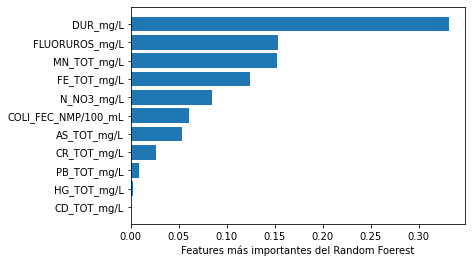

In [15]:
lm.feature_importances_
sorted_idx = lm.feature_importances_.argsort()
plt.barh(X_enc.columns[sorted_idx], lm.feature_importances_[sorted_idx])
plt.xlabel("Features más importantes del Random Foerest")

In [37]:
y_pred = lm.predict(X_test).round()

In [54]:
#y_test["SEMAFORO"].to_numpy()
#y_pred
print(classification_report(y_test["SEMAFORO"].to_numpy(), y_pred, labels=[1,2,3]))

              precision    recall  f1-score   support

           1       0.99      0.84      0.91        97
           2       0.77      0.91      0.83        68
           3       0.88      0.92      0.90        49

    accuracy                           0.88       214
   macro avg       0.88      0.89      0.88       214
weighted avg       0.89      0.88      0.88       214



In [51]:
cf=confusion_matrix(y_test["SEMAFORO"].to_numpy(), y_pred)
cf

array([[81, 16,  0],
       [ 0, 62,  6],
       [ 1,  3, 45]])

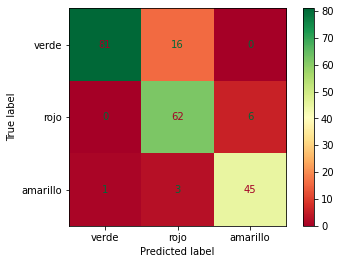

In [58]:

cm_display = ConfusionMatrixDisplay(confusion_matrix = cf, display_labels = ['verde','rojo','amarillo'])

cm_display.plot(cmap="RdYlGn")
plt.show()